In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "pategan"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.106519,-0.044642,0.048540,-0.078090,0.095955,0.039264,0.037341,-0.009908,-0.019004,-0.081128,58.298300
1,-0.020761,0.050680,0.008405,0.007859,0.056118,0.018640,0.080736,-0.050295,-0.073951,0.069938,66.352185
2,-0.075662,-0.044642,0.064763,-0.095697,0.061918,0.058788,-0.028517,0.019150,-0.102054,0.014496,127.519187
3,-0.001606,-0.044642,0.007467,-0.010138,-0.024652,0.053916,0.097885,0.006123,0.036378,-0.031838,136.339011
4,-0.085853,0.050680,0.060140,0.051471,0.007424,-0.025067,0.021176,0.029265,-0.088878,0.012828,246.814310
5,0.029890,-0.044642,0.005959,0.070906,-0.051634,-0.048391,0.057231,-0.036875,0.024865,-0.002208,265.806218
6,-0.044545,-0.044642,-0.050115,0.099880,-0.043371,0.003573,-0.066695,-0.052067,0.048406,0.005527,116.039359
7,-0.014515,0.050680,0.019781,0.003556,0.038616,-0.009985,-0.007761,-0.004793,0.023808,0.044542,122.428842
8,-0.026533,-0.044642,-0.050294,-0.057160,-0.084598,0.015436,0.038700,-0.049510,0.043103,0.033655,157.077771
9,-0.062769,-0.044642,-0.042551,-0.032727,0.001022,0.165273,0.009828,-0.027806,0.017562,-0.009382,247.567942


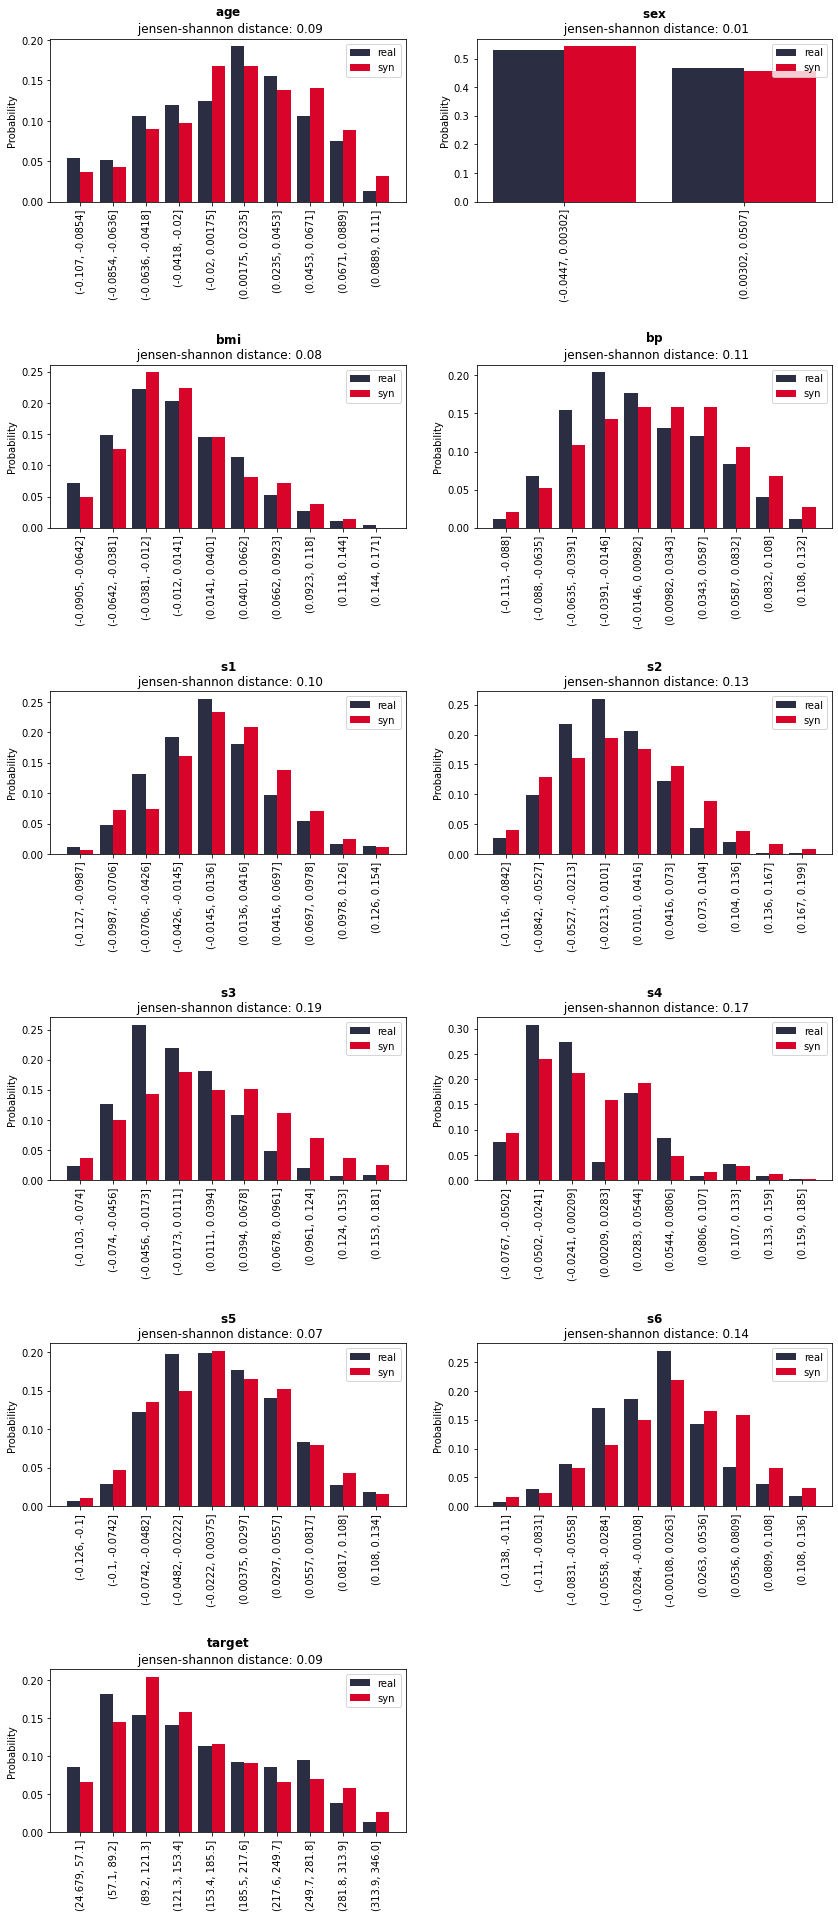

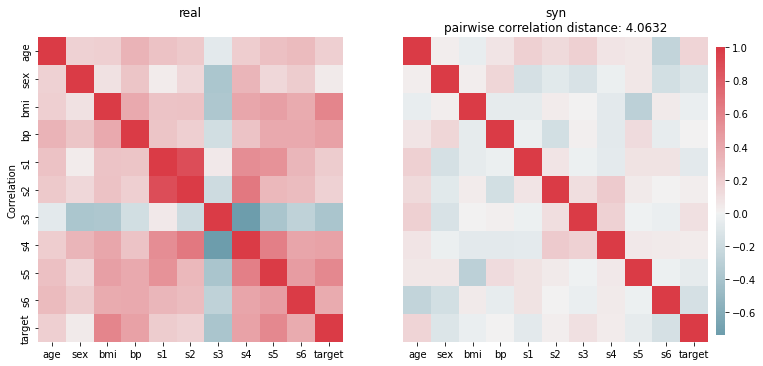

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : pategan


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0
sanity.common_rows_proportion,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.01
sanity.avg_distance_nearest_neighbor,0.046676,0.047867,0.047417,0.000528,0.047709,0.000595,3,0,0.01
sanity.inlier_probability,0.961538,0.986425,0.973605,0.010174,0.972851,0.012443,3,0,0.01
sanity.outlier_probability,0.002262,0.002262,0.002262,0.0,0.002262,0.0,3,0,0.01
statistical.inverse_kl_divergence,0.91748,0.944221,0.933181,0.011403,0.937842,0.01337,3,0,0.02
statistical.kolmogorov_smirnov_test,0.875566,0.909091,0.893734,0.01383,0.896545,0.016763,3,0,0.02
statistical.chi_squared_test,0.712763,0.814549,0.750762,0.045379,0.724974,0.050893,3,0,0.02
statistical.maximum_mean_discrepancy,0.004373,0.005651,0.004869,0.000559,0.004582,0.000639,3,0,0.05
statistical.inverse_cdf_distance,1.663145,1.93573,1.813707,0.113097,1.842245,0.136292,3,0,6.53
